In [37]:
import os
import unicodedata
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv('/home/jovyan/india-research/data/final_df.csv')
df.head(5)

,likes,replies,retweets,text,timestamp,url
0,7,1,51,#Mohali Need Blood Platelets B+ve 1 unit at Fo...,2023-09-18 04:22:00+00:00,https://twitter.com/BloodDonorsIn/status/17036...
1,1,0,0,Please share city name. Thanks!,2023-09-17 19:58:00+00:00,https://twitter.com/BloodDonorsIn/status/17034...
2,10,0,85,#Lucknow #UttarPradesh Need Blood Any group 10...,2023-09-17 08:44:00+00:00,https://twitter.com/BloodDonorsIn/status/17033...
3,11,0,89,#Delhi Need Blood Any group 2 units at BLK Hos...,2023-09-17 08:43:00+00:00,https://twitter.com/BloodDonorsIn/status/17033...
4,9,0,64,#Jabalpur Need Blood AB-ve 2 units at Seth Man...,2023-09-17 08:42:00+00:00,https://twitter.com/BloodDonorsIn/status/17033...


In [19]:
# TASK 1: let's extract city names from text columns
df['city'] = df['text'].str.extract(r'#(\w+)', expand = False)

# delete SOS and NaN values
df = df[df['city'] != 'SOS']
df.dropna(subset = ['city'], inplace = True)

# set all cities to lowercase to avoid duplicates
df['city'] = df['city'].str.lower()

# delete values that are numbers
df = df[df['city'].str[0] != '9']
df.head(5)

,likes,replies,retweets,text,timestamp,url,city
0,7,1,51,#Mohali Need Blood Platelets B+ve 1 unit at Fo...,2023-09-18 04:22:00+00:00,https://twitter.com/BloodDonorsIn/status/17036...,mohali
2,10,0,85,#Lucknow #UttarPradesh Need Blood Any group 10...,2023-09-17 08:44:00+00:00,https://twitter.com/BloodDonorsIn/status/17033...,lucknow
3,11,0,89,#Delhi Need Blood Any group 2 units at BLK Hos...,2023-09-17 08:43:00+00:00,https://twitter.com/BloodDonorsIn/status/17033...,delhi
4,9,0,64,#Jabalpur Need Blood AB-ve 2 units at Seth Man...,2023-09-17 08:42:00+00:00,https://twitter.com/BloodDonorsIn/status/17033...,jabalpur
5,12,0,78,#Delhi Need Blood B+ve 2 units at Manipal Hosp...,2023-09-17 08:40:00+00:00,https://twitter.com/BloodDonorsIn/status/17033...,delhi


In [20]:
cities = df['city'].unique()
cities.sort()

for i in range(len(cities)):
    print(cities[i])

aarah
aarilova
aasaripallam
ab
adilabad
adyar
agartala
agra
ahamadabad
ahemdabad
ahmadabad
ahmadnagar
ahmedabad
ahmednagar
ahore
ajmer
akbarpur
akividu
akola
aligadh
aligarh
alipore
allagadda
allahabad
alwar
alwarpet
alway
amalapuram
ambala
ambikapur
ambur
amethi
amravati
amritsar
amritsartrainmishap
amroha
anakapalle
anand
anantapur
ananthapur
ananthapuram
anantnag
anantpur
andheri
andhra
andhrapradesh
andrapradesh
angul
ara
arilova
ariyaloor
ariyalur
arrah
aruppukottai
asansol
asaripallam
ashoknagar
assam
attur
aurangabad
avadi
avutapalli
ayodhya
azamgarh
azzossim
b
bachupalli
badaun
badgam
baharampur
bahraich
bairamalguda
bakshinagar
balangir
balasore
ballia
baloda
balrampur
bambolin
banajara
banaras
banda
bandipora
bandipura
bangalaru
bangalore
bangaluru
banglore
banjara
banjarahills
bankura
baramulla
baran
baraut
bardhaman
bareilly
bargarh
bariatu
baripada
barmer
baroda
barpeta
barzullah
basti
bathinda
battalapalle
begaluru
begusarai
behrampur
belagavi
belapur
belhi
benaras
bengal

In [43]:
# import real cities in India
real_cities = pd.read_excel('/home/jovyan/india-research/data/worldcities.xlsx')
real_cities = real_cities[real_cities['country'] == 'India'].loc[:, 'city'].str.lower()

# let's normalize real city names so all letters are from english alphabet
def normalize_city_name(city_name):
    normalized_name = ''.join([c for c in unicodedata.normalize('NFD', city_name) if not unicodedata.combining(c)])
    normalized_name = ' '.join(normalized_name.split())
    normalized_name = normalized_name.lower()
    return normalized_name

real_cities = real_cities.apply(normalize_city_name)

In [68]:
est = []
netu = []
for i in range(len(cities)):
    if cities[i] in real_cities.values:
        est.append(cities[i])
    else:
        netu.append(cities[i])

In [109]:
def levenshtein_distance(s1, s2):
    matrix = [[0] * (len(s2) + 1) for _ in range(len(s1) + 1)]

    for i in range(len(s1) + 1):
        matrix[i][0] = i
    for j in range(len(s2) + 1):
        matrix[0][j] = j

    for i in range(1, len(s1) + 1):
        for j in range(1, len(s2) + 1):
            cost = 0 if s1[i - 1] == s2[j - 1] else 1
            matrix[i][j] = min(
                matrix[i - 1][j] + 1,
                matrix[i][j - 1] + 1,
                matrix[i - 1][j - 1] + cost)

    return matrix[-1][-1]

dict = {}
for city in netu:
    for real in est:
        if levenshtein_distance(city, real) <= 1:
            dict[city] = real
            continue

{'aarah': 'arrah', 'ahamadabad': 'ahmadabad', 'ahmednagar': 'ahmadnagar', 'aligadh': 'aligarh', 'alway': 'alwar', 'ananthapur': 'anantapur', 'ara': 'agra', 'badaun': 'budaun', 'baloda': 'baroda', 'bandipora': 'bandipura', 'banglore': 'bangalore', 'bengalore': 'bangalore', 'bhubaneshar': 'bhubaneshwar', 'bhubaneshewar': 'bhubaneshwar', 'bhubaneswar': 'bhubaneshwar', 'bhubhneshwar': 'bhubaneshwar', 'bhubneshwar': 'bhubaneshwar', 'bhuvaneshwar': 'bhubaneshwar', 'bhuwaneshwar': 'bhubaneshwar', 'chamdigarh': 'chandigarh', 'chandigarah': 'chandigarh', 'chandigargh': 'chandigarh', 'channai': 'chennai', 'chenai': 'chennai', 'chennao': 'chennai', 'chenni': 'chennai', 'chitoor': 'chittoor', 'combatore': 'coimbatore', 'cuttak': 'cuttack', 'darbanga': 'darbhanga', 'ddelhi': 'delhi', 'dellhi': 'delhi', 'dindigal': 'dindigul', 'dungapur': 'durgapur', 'dwaraka': 'dwarka', 'fardabad': 'faridabad', 'faridabd': 'faridabad', 'farrukabad': 'farrukhabad', 'gaziabad': 'ghaziabad', 'ghajiabad': 'ghaziabad', 

In [116]:
# add the following key and value to dict to replace
dict['new'] = 'new delhi'

df['city'] = df['city'].replace(dict)
df

,likes,replies,retweets,text,timestamp,url,city
0,7,1,51,#Mohali Need Blood Platelets B+ve 1 unit at Fo...,2023-09-18 04:22:00+00:00,https://twitter.com/BloodDonorsIn/status/17036...,mohali
2,10,0,85,#Lucknow #UttarPradesh Need Blood Any group 10...,2023-09-17 08:44:00+00:00,https://twitter.com/BloodDonorsIn/status/17033...,lucknow
3,11,0,89,#Delhi Need Blood Any group 2 units at BLK Hos...,2023-09-17 08:43:00+00:00,https://twitter.com/BloodDonorsIn/status/17033...,delhi
4,9,0,64,#Jabalpur Need Blood AB-ve 2 units at Seth Man...,2023-09-17 08:42:00+00:00,https://twitter.com/BloodDonorsIn/status/17033...,jabalpur
5,12,0,78,#Delhi Need Blood B+ve 2 units at Manipal Hosp...,2023-09-17 08:40:00+00:00,https://twitter.com/BloodDonorsIn/status/17033...,delhi
...,...,...,...,...,...,...,...
70928,6,0,29,#Patna\nNeed #Blood Type : B-positive\nBlood ...,2021-07-02 06:01:00+00:00,https://twitter.com/BloodDonorsIn/status/14108...,patna
70929,9,0,37,#Bhubaneswar \nNeed #Blood Type : O-negative\...,2021-07-02 05:58:00+00:00,https://twitter.com/BloodDonorsIn/status/14108...,bhubaneshwar
70932,8,1,32,#Nagercoil\nNeed #Blood Type : O-negative\nBl...,2021-07-02 05:53:00+00:00,https://twitter.com/BloodDonorsIn/status/14108...,nagercoil
70937,6,0,27,#New Dehli\nNeed #Blood Type : O-positive\nBl...,2021-07-02 05:43:00+00:00,https://twitter.com/BloodDonorsIn/status/14108...,new delhi


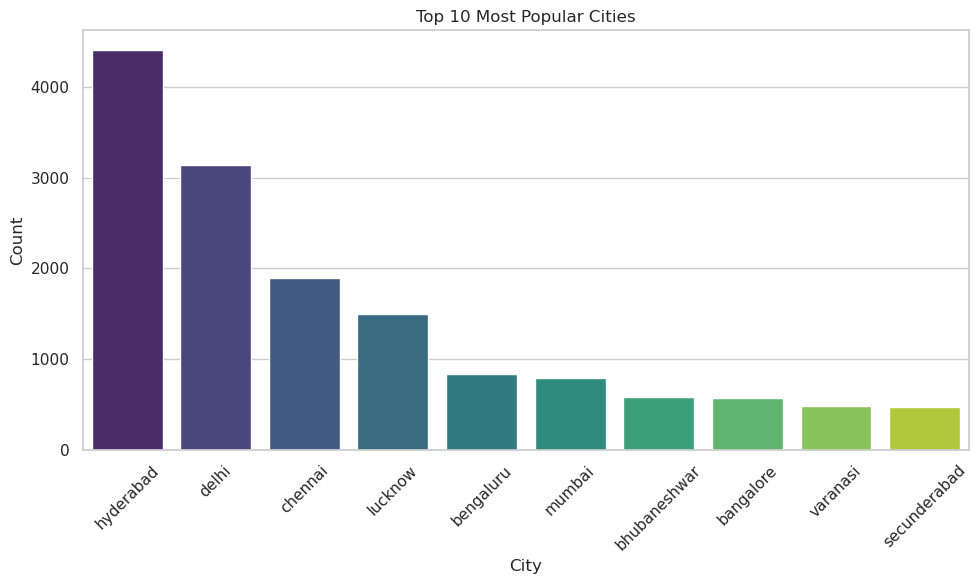

In [134]:
city_counts = df['city'].value_counts()
top_cities = city_counts.head(10)

sns.set(style = "whitegrid")

plt.figure(figsize = (10, 6))
sns.barplot(x = top_cities.index, y = top_cities.values, palette = "viridis")
plt.title('Top 10 Most Popular Cities')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation = 45)

plt.tight_layout()
plt.show()